# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [155]:
# if plotnine is not installed in Jupter then use the following command to install it 


Best Covariance Type: full
Best Negative Log-Likelihood: -4.960814094046011


Running this project require the following imports 

In [156]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score


from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

%matplotlib inline

In [157]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i%7],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i%7], marker = 'x', s = 100)

In [158]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def plot_gmm_contours(gmm, data, pca_components=2, n_levels=10):
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=pca_components)
    data_pca = pca.fit_transform(data)
    
    # Define grid range for the contour plot
    x_min, x_max = data_pca[:, 0].min() - 1, data_pca[:, 0].max() + 1
    y_min, y_max = data_pca[:, 1].min() - 1, data_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predict probabilities for each point in the grid
    Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contour map
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8, levels=n_levels)
    plt.colorbar(label='Negative Log-Likelihood')
    
    # Plot data points
    plt.scatter(data_pca[:, 0], data_pca[:, 1], marker='o', s=30, edgecolor='k', cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Gaussian Mixture Model Contours after PCA')
    plt.grid(True)
    plt.show()


## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



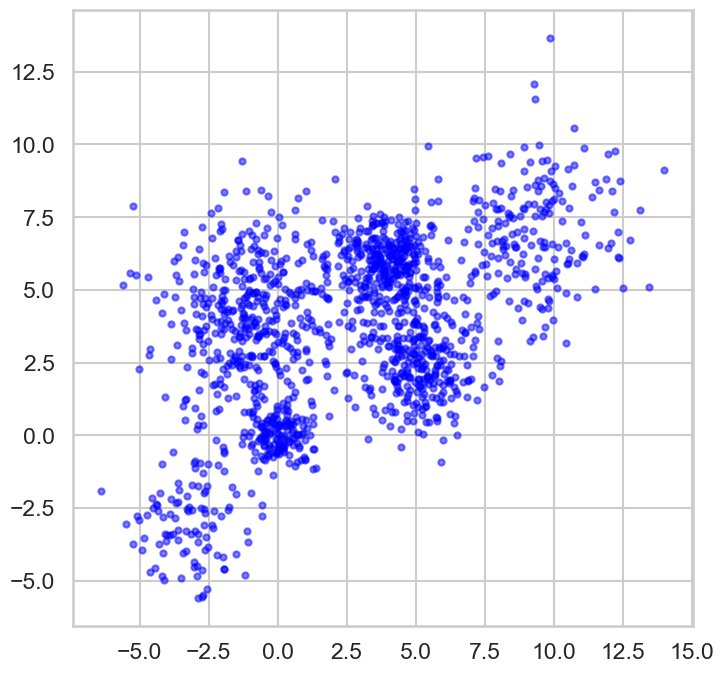

In [159]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

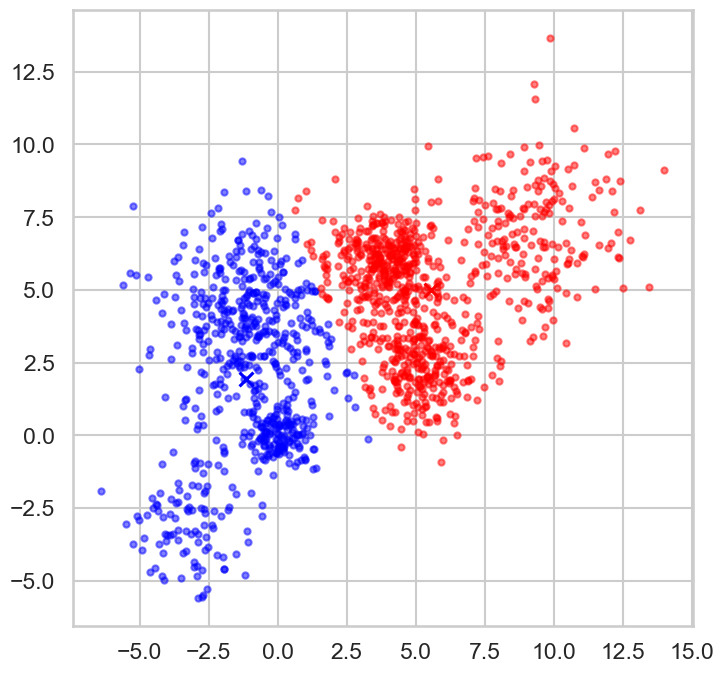

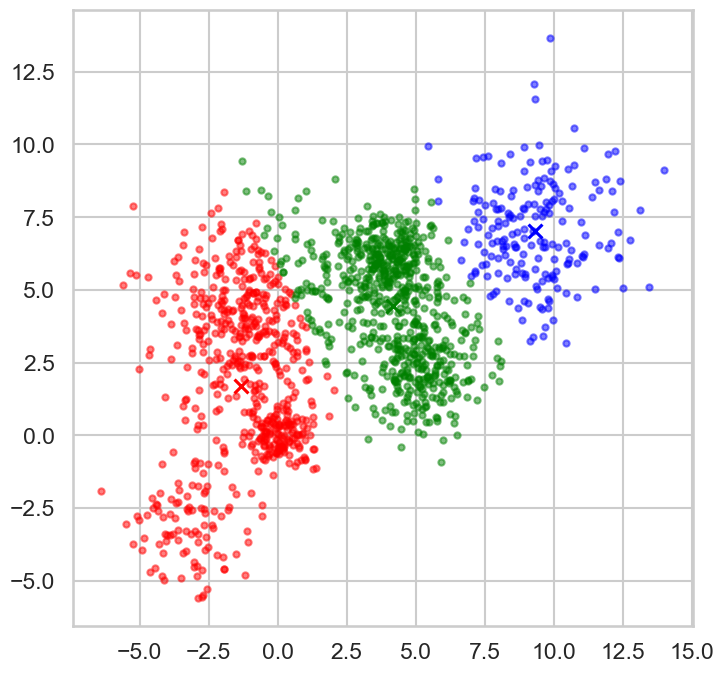

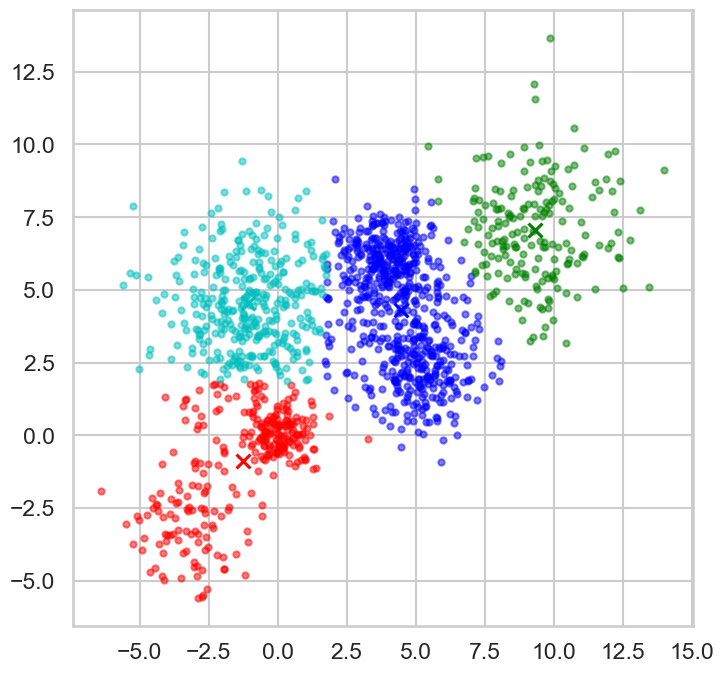

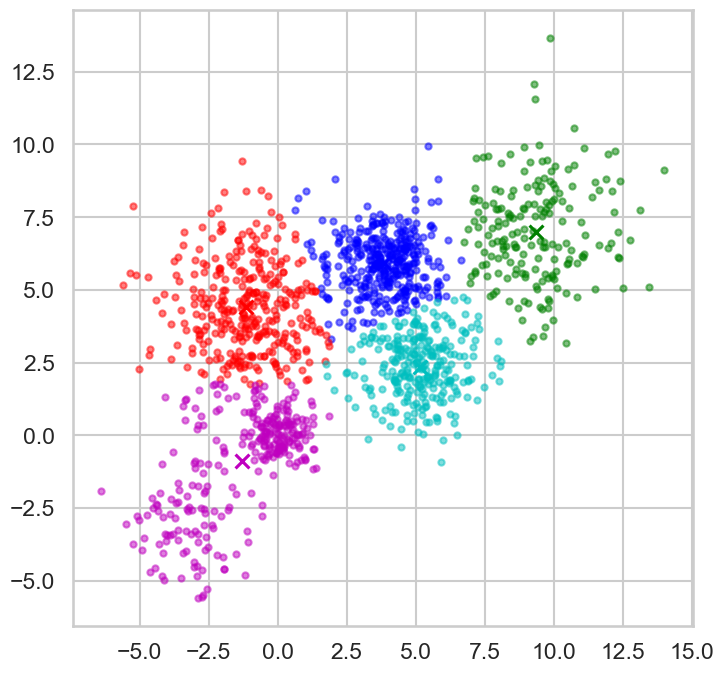

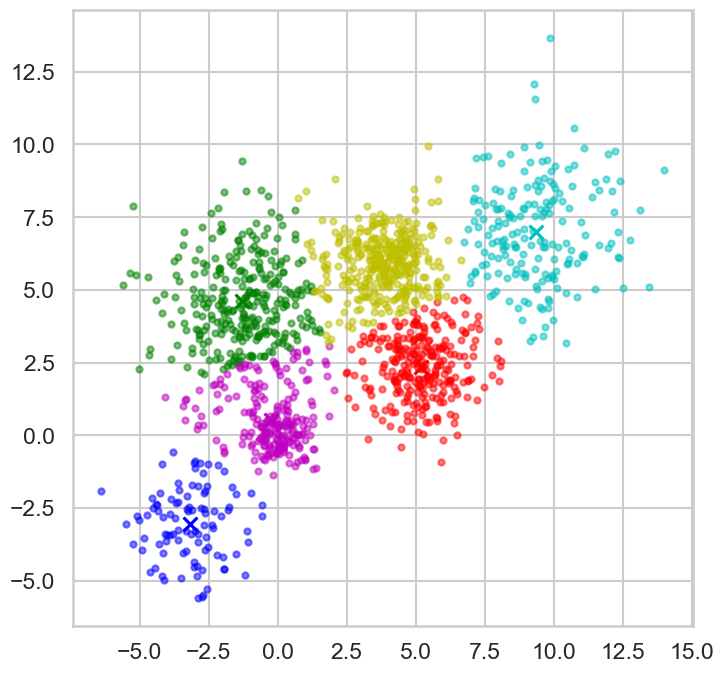

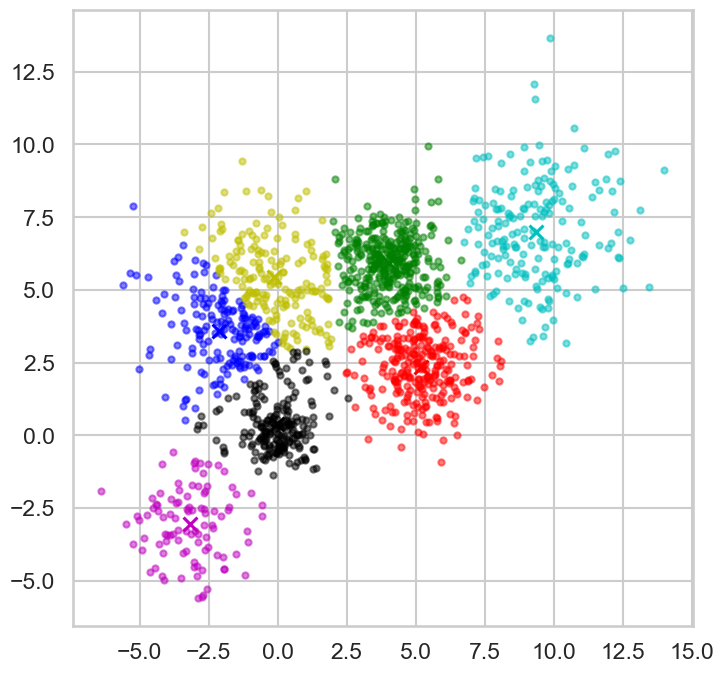

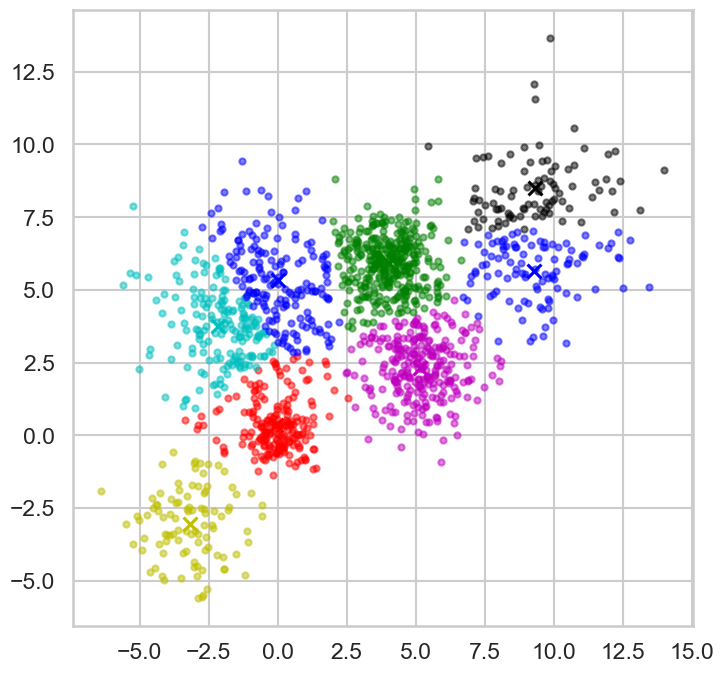

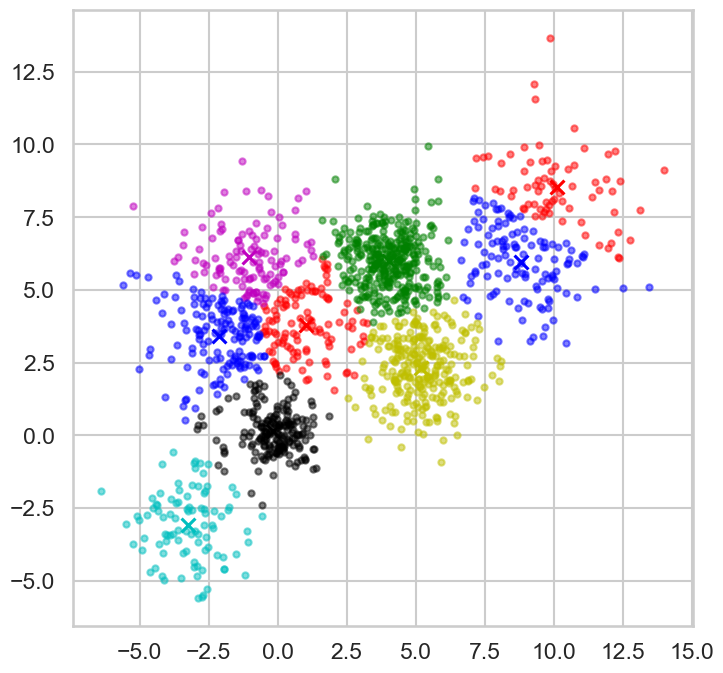

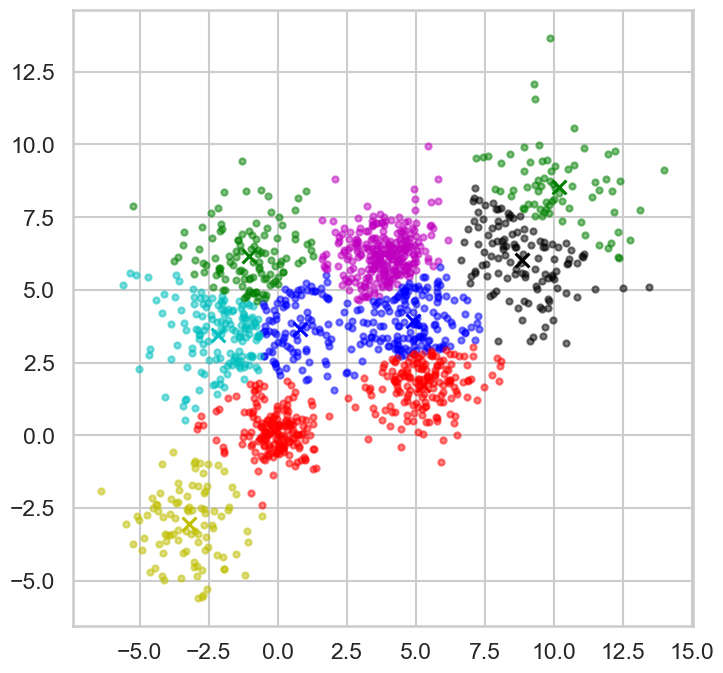

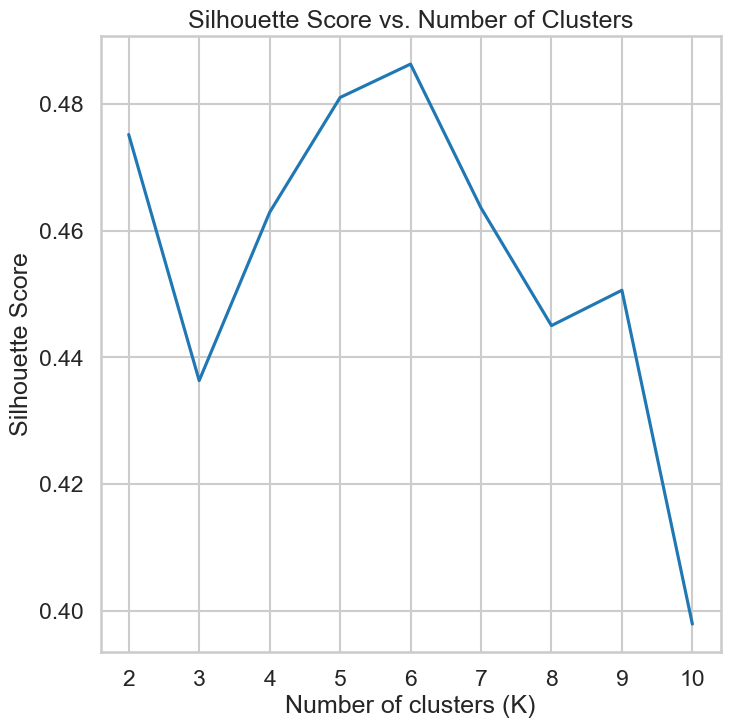

Best K value: 6
Silhouette Score for Best K: 0.4862794240733028


In [160]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Multi_blob_Data)
    
    # Predict cluster labels
    labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(Multi_blob_Data, labels)
    silhouette_scores.append(silhouette_avg)
    plt.figure()
    display_cluster(Multi_blob_Data,kmeans,num_clusters=k)
    # Display outcome of clustering for current value of K
    # Plot the clusters or some representation of them
    
# Plot distortion function versus K
plt.figure()
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Choose the appropriate value of K based on the distortion function or silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print("Best K value:", best_k)

# Store the silhouette_score for the best K for later comparison
best_silhouette_score = max(silhouette_scores)
print("Silhouette Score for Best K:", best_silhouette_score)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [161]:
# Function to display dendrogram
from sklearn.metrics import silhouette_score
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    print(model)
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def calculate_linkage_distances(data, affinity, linkage):
    if affinity == 'cosine':
        linkage_matrix = linkage(data, metric='cosine', method=linkage)
    else:
        linkage_matrix = linkage(data, metric=affinity, method=linkage)
    return linkage_matrix[:, 2]

# Define a function to perform hierarchical clustering with varying parameters
def hierarchical_clustering(data, affinity, linkage, n_clusters=None, distance_threshold=None):
    # Perform hierarchical clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage, distance_threshold=distance_threshold,compute_distances=True)
    model.fit(data)
    
    # Plot dendrogram
    # plt.figure(figsize=(10, 6))
    # plt.title(f'Hierarchical Clustering with Affinity={affinity}, Linkage={linkage}, Distance Threshold={distance_threshold}')
    # plot_dendrogram(model, truncate_mode='level', p=3)
    # plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    # plt.ylabel("Distance")
    # plt.show()
    
    # # Calculate silhouette score
    # silhouette_avg = silhouette_score(data, model.labels_)
    # print("Silhouette Score:", silhouette_avg)
    
    # # Display resulting clusters
    # plt.figure(figsize=(8, 8))
    # sns.scatterplot(x=data[:,0], y=data[:,1], hue=model.labels_, palette='Set1', legend='full')
    # plt.title(f'Clusters with Affinity={affinity}, Linkage={linkage}, Distance Threshold={distance_threshold}')
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.show()
    
    return silhouette_avg

# Parameters to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
n_clusters = range(2,6)  # Number of clusters based on your original dataset

best_silhouette_score = float('-inf')
best_params = None

# Iterate over parameters
for affinity in affinities:
    for linkage in linkages:
        for nc in n_clusters:
            silhouette_score2 = hierarchical_clustering(Multi_blob_Data, affinity, linkage, n_clusters=nc)
            if silhouette_score2 > best_silhouette_score:
                best_silhouette_score = silhouette_score2
                best_params = (affinity, linkage, nc)

print("Best Silhouette Score:", best_silhouette_score)
print("Best Parameters:", best_params)

Best Silhouette Score: 0.3978806896254786
Best Parameters: ('euclidean', 'average', 2)


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [162]:
eps_range = np.linspace(0.1, 3, 10)
min_samples_range = np.arange(5, 26,5)

# Initialize variables to store best parameters and silhouette score
best_eps = None
best_min_samples = None
best_score = -1

# Lists to store silhouette scores for plotting
silhouette_scores = []

# Loop through parameter combinations
for eps in eps_range:
    for min_samples in min_samples_range:
        # Perform DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(Multi_blob_Data)
        
        # Compute silhouette score
        if len(np.unique(clusters))>1:
            score = silhouette_score(Multi_blob_Data, clusters)
        
        # Store the silhouette score
            silhouette_scores.append((eps, min_samples, score))
        # plt.figure()
        # sns.scatterplot(x=Multi_blob_Data[:,0], y=Multi_blob_Data[:,1], hue=clusters, palette='Set1', legend='full')
        # Check if this score is better than the current best score
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
        

# Plot silhouette score versus parameter variations
silhouette_scores = np.array(silhouette_scores)
# plt.figure(figsize=(10, 6))
# plt.scatter(silhouette_scores[:, 0], silhouette_scores[:, 1], c=silhouette_scores[:, 2], cmap='viridis')
# plt.colorbar(label='Silhouette Score')
# plt.xlabel('EPS')
# plt.ylabel('Min Samples')
# plt.title('Silhouette Score vs EPS and Min Samples')
# plt.grid(True)
# plt.show()

# # Perform DBSCAN clustering with the best parameters
# best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
# best_clusters = best_dbscan.fit_predict(Multi_blob_Data)

# # Plot resulting clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=best_clusters, cmap='viridis')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('DBSCAN Clustering')
# plt.show()

# Print best parameters and silhouette score
print("Best EPS:", best_eps)
print("Best Min Samples:", best_min_samples)
print("Best Silhouette Score:", best_score)

Best EPS: 2.3555555555555556
Best Min Samples: 15
Best Silhouette Score: 0.4685207355522043


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

Best Covariance Type: full
Best Negative Log-Likelihood: -4.960814094046011


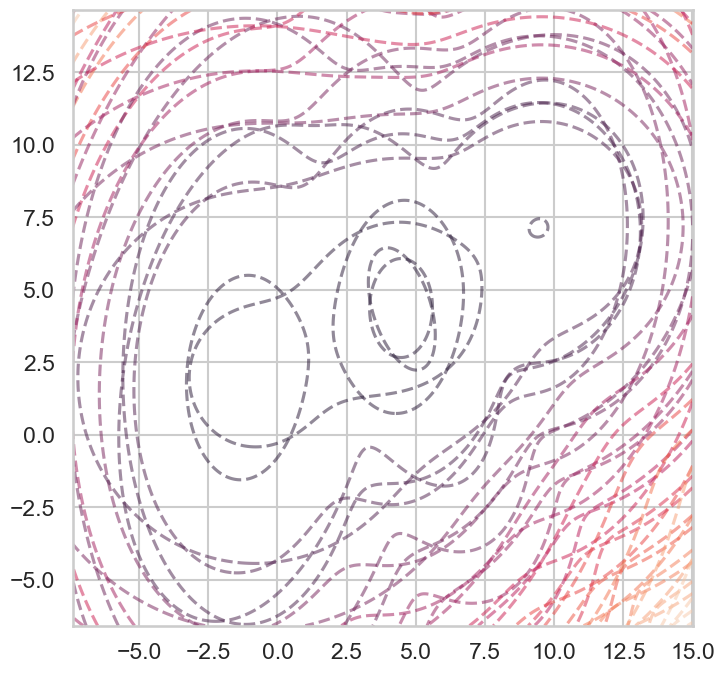

In [163]:
# Define covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Initialize variables to store best parameters and silhouette score
best_covariance_type = None
best_score = -np.inf
best_gmm = None

# Lists to store GMMs and their likelihoods for contour plot
gmms = []
likelihoods = []

# Loop through covariance types
for cov_type in covariance_types:
    # Fit GMM
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=0)
    gmm.fit(Multi_blob_Data)
    
    # Compute log-likelihood
    score = gmm.score(Multi_blob_Data)
    
    # Store GMM and its likelihood
    gmms.append(gmm)
    likelihoods.append(score)
    
    # Check if this likelihood is better than the current best likelihood
    if score > best_score:
        best_score = score
        best_covariance_type = cov_type
        best_gmm = gmm

# Plot resulting distributions
# plt.figure(figsize=(10, 8))
# x_min, x_max = Multi_blob_Data[:, 0].min() - 1, Multi_blob_Data[:, 0].max() + 1
# y_min, y_max = Multi_blob_Data[:, 1].min() - 1, Multi_blob_Data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# Z = -best_gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.8)

# Plot individual components
for gmm in gmms:
    Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=10, linestyles='--', alpha=0.5)

# plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], marker='o', s=30, edgecolor='k', cmap='viridis')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Gaussian Mixture Model Clustering')
# plt.colorbar(label='Negative Log-Likelihood')
# plt.show()

# Print best covariance type and likelihood
print("Best Covariance Type:", best_covariance_type)
print("Best Negative Log-Likelihood:", best_score)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [164]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
print(iris_data.data)
iris_data=iris_data.data
def display_cluster2(data, labels):
    n_features = data.shape[1]
    n_plots = n_features // 2
    
    fig, axes = plt.subplots(nrows=1, ncols=n_plots, figsize=(12, 6))
    
    for i in range(n_plots):
        sns.scatterplot(x=data[:, i*2],y= data[:, i*2+1], hue=labels, palette='viridis', ax=axes[i])
        axes[i].set_title(f'Features {i*2+1} vs {i*2+2}')
        axes[i].set_xlabel(f'Feature {i*2+1}')
        axes[i].set_ylabel(f'Feature {i*2+2}')
    
    plt.tight_layout()
    plt.show()



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [165]:
silhouette_scores = []
k_values = range(2, 11)
distortion=[]
for k in k_values:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris_data)
    
    # Predict cluster labels
    labels = kmeans.labels_
    distortion.append(kmeans.inertia_)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(iris_data, labels)
    silhouette_scores.append(silhouette_avg)
    plt.figure()
    # display_cluster2(iris_data,kmeans.labels_)
    # Display outcome of clustering for current value of K
    # Plot the clusters or some representation of them
    
# Plot distortion function versus K
# plt.figure()
# plt.title('elbow method')
# plt.plot(range(2,11),distortion)
# plt.figure()
# plt.plot(k_values, silhouette_scores)
# plt.xlabel('Number of clusters (K)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs. Number of Clusters')
# plt.show()

# Choose the appropriate value of K based on the distortion function or silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print("Best K value:", best_k)

# Store the silhouette_score for the best K for later comparison
best_silhouette_score = max(silhouette_scores)
print("Silhouette Score for Best K:", best_silhouette_score)

Best K value: 2
Silhouette Score for Best K: 0.6810461692117462


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [166]:
# Function to display dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    print(model)
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def calculate_linkage_distances(data, affinity, linkage):
    if affinity == 'cosine':
        linkage_matrix = linkage(data, metric='cosine', method=linkage)
    else:
        linkage_matrix = linkage(data, metric=affinity, method=linkage)
    return linkage_matrix[:, 2]

# Define a function to perform hierarchical clustering with varying parameters
def hierarchical_clustering(data, affinity, linkage, n_clusters=None, distance_threshold=None):
    # Perform hierarchical clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage, distance_threshold=distance_threshold,compute_distances=True)
    model.fit(data)
    
    # # Plot dendrogram
    # plt.figure(figsize=(10, 6))
    # plt.title(f'Hierarchical Clustering with Affinity={affinity}, Linkage={linkage}, Distance Threshold={distance_threshold}')
    # plot_dendrogram(model, truncate_mode='level', p=3)
    # plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    # plt.ylabel("Distance")
    # plt.show()
    
    # # Calculate silhouette score
    # silhouette_avg = silhouette_score(data, model.labels_)
    # print("Silhouette Score:", silhouette_avg)
    
    # # Display resulting clusters
    # plt.figure(figsize=(8, 8))
    # sns.scatterplot(x=data[:,0], y=data[:,1], hue=model.labels_, palette='Set1', legend='full')
    # plt.title(f'Clusters with Affinity={affinity}, Linkage={linkage}, Distance Threshold={distance_threshold}')
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.show()
    
    return silhouette_avg

# Parameters to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
n_clusters = range(2,6)  # Number of clusters based on your original dataset

best_silhouette_score = float('-inf')
best_params = None

# Iterate over parameters
for affinity in affinities:
    for linkage in linkages:
        for nc in n_clusters:
            silhouette_score2 = hierarchical_clustering(iris_data, affinity, linkage, n_clusters=nc)
            if silhouette_score2 > best_silhouette_score:
                best_silhouette_score = silhouette_score2
                best_params = (affinity, linkage, nc)

print("Best Silhouette Score:", best_silhouette_score)
print("Best Parameters:", best_params)

Best Silhouette Score: 0.312678272183376
Best Parameters: ('euclidean', 'average', 2)


In [172]:
eps_range = np.linspace(0.1, 3, 10)
min_samples_range = np.arange(5, 26,5)

# Initialize variables to store best parameters and silhouette score
best_eps = None
best_min_samples = None
best_score = -1

# Lists to store silhouette scores for plotting
silhouette_scores = []

# Loop through parameter combinations
for eps in eps_range:
    for min_samples in min_samples_range:
        # Perform DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(iris_data)
        
        # Compute silhouette score
        if len(np.unique(clusters))>1:
            score = silhouette_score(iris_data, clusters)
        
        # Store the silhouette score
            silhouette_scores.append((eps, min_samples, score))
        # plt.figure()
        # sns.scatterplot(x=iris_data[:,0], y=iris_data[:,1], hue=clusters, palette='Set1', legend='full')
        # Check if this score is better than the current best score
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
        

# Plot silhouette score versus parameter variations
silhouette_scores = np.array(silhouette_scores)
# plt.figure(figsize=(10, 6))
# plt.scatter(silhouette_scores[:, 0], silhouette_scores[:, 1], c=silhouette_scores[:, 2], cmap='viridis')
# plt.colorbar(label='Silhouette Score')
# plt.xlabel('EPS')
# plt.ylabel('Min Samples')
# plt.title('Silhouette Score vs EPS and Min Samples')
# plt.grid(True)
# plt.show()

# # Perform DBSCAN clustering with the best parameters
# best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
# best_clusters = best_dbscan.fit_predict(iris_data)

# # Plot resulting clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(iris_data[:, 0], iris_data[:, 1], c=best_clusters, cmap='viridis')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('DBSCAN Clustering')
# plt.show()

# # Print best parameters and silhouette score
# print("Best EPS:", best_eps)
# print("Best Min Samples:", best_min_samples)
# print("Best Silhouette Score:", best_score)

In [174]:
# # Define covariance types
# covariance_types = ['full', 'tied', 'diag', 'spherical']

# # Initialize variables to store best parameters and silhouette score
# best_covariance_type = None
# best_score = -np.inf
# best_gmm = None

# # Lists to store GMMs and their likelihoods for contour plot
# gmms = []
# likelihoods = []

# # Loop through covariance types
# for cov_type in covariance_types:
#     # Fit GMM
#     gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=0)
#     gmm.fit(iris_data)
    
#     # Compute log-likelihood
#     score = gmm.score(iris_data)
    
#     # Store GMM and its likelihood
#     gmms.append(gmm)
#     likelihoods.append(score)
    
#     # Check if this likelihood is better than the current best likelihood
#     if score > best_score:
#         best_score = score
#         best_covariance_type = cov_type
#         best_gmm = gmm

# import seaborn as sns

# # Plot each pair of dimensions with contours of the best GMM and individual components
# n_dimensions = iris_data.shape[1]
# fig, axes = plt.subplots(n_dimensions, n_dimensions, figsize=(15, 15))

# for i in range(n_dimensions):
#     for j in range(n_dimensions):
#         if i != j:
#             # Create a dataframe with the pair of dimensions
#             df = pd.DataFrame(iris_data[:, [i, j]], columns=[f'Feature {i+1}', f'Feature {j+1}'])
            
#             # Plot data points
#             sns.scatterplot(data=df, x=f'Feature {i+1}', y=f'Feature {j+1}', ax=axes[i, j], palette='viridis', legend=False)
            
#             # Plot contours for the best GMM
#             xx, yy = np.meshgrid(np.linspace(df[f'Feature {i+1}'].min(), df[f'Feature {i+1}'].max(), 100),
#                                  np.linspace(df[f'Feature {j+1}'].min(), df[f'Feature {j+1}'].max(), 100))
#             #Z = -best_gmms[i][j].score_samples(np.c_[xx.ravel(), yy.ravel()])
#             #Z = Z.reshape(xx.shape)
#             #axes[i, j].contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
            
#             # Plot contours for individual components
#             for gmm in gmms:
#                 Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
#                 Z = Z.reshape(xx.shape)
#                 axes[i, j].contour(xx, yy, Z, levels=10, linestyles='--', alpha=0.5)
                
#             axes[i, j].set_xlabel(f'Feature {i+1}')
#             axes[i, j].set_ylabel(f'Feature {j+1}')
            
# # Adjust layout
# plt.tight_layout()
# plt.show()


In [176]:

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(iris_data)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data_pca)

# Predict cluster labels
labels = gmm.predict(data_pca)

# # Plot the clusters
# plt.figure(figsize=(10, 8))

# # Plot clusters using PCA components
# plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o', s=30, edgecolor='k')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Gaussian Mixture Model Clustering after PCA')
# plt.colorbar(label='Cluster')
# plt.grid(True)
# plt.show()
# plot_gmm_contours(gmm, data_pca)

## Customer dataset
Repeat all the above on the customer data set 

In [177]:
from sklearn.preprocessing import StandardScaler
# Read the CSV file
data = pd.read_csv('/Users/claramagdy/Desktop/Ml/Ass1/Customer data.csv')

# Assuming your data contains only numerical features, you can drop non-numeric columns if any
data_numeric = data.select_dtypes(include=[np.number])

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)



In [178]:
silhouette_scores = []
k_values = range(2, 11)
distortion=[]
for k in k_values:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    
    # Predict cluster labels
    labels = kmeans.labels_
    distortion.append(kmeans.inertia_)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    plt.figure()
    # display_cluster2(data_scaled,kmeans.labels_)
    # Display outcome of clustering for current value of K
    # Plot the clusters or some representation of them
    
# Plot distortion function versus K
# plt.figure()
# plt.title('elbow method')
# plt.plot(range(2,11),distortion)
# plt.figure()
# plt.plot(k_values, silhouette_scores)
# plt.xlabel('Number of clusters (K)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs. Number of Clusters')
# plt.show()

# # Choose the appropriate value of K based on the distortion function or silhouette score
# best_k = k_values[np.argmax(silhouette_scores)]
# print("Best K value:", best_k)

# # Store the silhouette_score for the best K for later comparison
# best_silhouette_score = max(silhouette_scores)
# print("Silhouette Score for Best K:", best_silhouette_score)

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [179]:
# Function to display dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    print(model)
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
def calculate_linkage_distances(data, affinity, linkage):
    if affinity == 'cosine':
        linkage_matrix = linkage(data, metric='cosine', method=linkage)
    else:
        linkage_matrix = linkage(data, metric=affinity, method=linkage)
    return linkage_matrix[:, 2]

# Define a function to perform hierarchical clustering with varying parameters
def hierarchical_clustering(data, affinity, linkage, n_clusters=None, distance_threshold=None):
    # Perform hierarchical clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage, distance_threshold=distance_threshold,compute_distances=True)
    model.fit(data)
    
    # Plot dendrogram
    # plt.figure(figsize=(10, 6))
    # plt.title(f'Hierarchical Clustering with Affinity={affinity}, Linkage={linkage}, Distance Threshold={distance_threshold}')
    # plot_dendrogram(model, truncate_mode='level', p=3)
    # plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    # plt.ylabel("Distance")
    # plt.show()
    
    # # Calculate silhouette score
    # silhouette_avg = silhouette_score(data, model.labels_)
    # print("Silhouette Score:", silhouette_avg)
    
    # # Display resulting clusters
    # plt.figure(figsize=(8, 8))
    # sns.scatterplot(x=data[:,0], y=data[:,1], hue=model.labels_, palette='Set1', legend='full')
    # plt.title(f'Clusters with Affinity={affinity}, Linkage={linkage}, Distance Threshold={distance_threshold}')
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.show()
    
    return silhouette_avg

# Parameters to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
n_clusters = range(2,6)  # Number of clusters based on your original dataset

best_silhouette_score = float('-inf')
best_params = None

# Iterate over parameters
for affinity in affinities:
    for linkage in linkages:
        for nc in n_clusters:
            silhouette_score2 = hierarchical_clustering(data_scaled, affinity, linkage, n_clusters=nc)
            if silhouette_score2 > best_silhouette_score:
                best_silhouette_score = silhouette_score2
                best_params = (affinity, linkage, nc)

print("Best Silhouette Score:", best_silhouette_score)
print("Best Parameters:", best_params)

Best Silhouette Score: 0.24755206857564882
Best Parameters: ('euclidean', 'average', 2)


In [181]:
eps_range = np.linspace(0.1, 3, 10)
min_samples_range = np.arange(5, 26,5)

# Initialize variables to store best parameters and silhouette score
best_eps = None
best_min_samples = None
best_score = -1

# Lists to store silhouette scores for plotting
silhouette_scores = []

# Loop through parameter combinations
for eps in eps_range:
    for min_samples in min_samples_range:
        # Perform DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_scaled)
        
        # Compute silhouette score
        if len(np.unique(clusters))>1:
            score = silhouette_score(data_scaled, clusters)
        
        # Store the silhouette score
            silhouette_scores.append((eps, min_samples, score))
        # plt.figure()
        # sns.scatterplot(x=data_scaled[:,0], y=data_scaled[:,1], hue=clusters, palette='Set1', legend='full')
        # Check if this score is better than the current best score
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
        

# Plot silhouette score versus parameter variations
# silhouette_scores = np.array(silhouette_scores)
# plt.figure(figsize=(10, 6))
# plt.scatter(silhouette_scores[:, 0], silhouette_scores[:, 1], c=silhouette_scores[:, 2], cmap='viridis')
# plt.colorbar(label='Silhouette Score')
# plt.xlabel('EPS')
# plt.ylabel('Min Samples')
# plt.title('Silhouette Score vs EPS and Min Samples')
# plt.grid(True)
# plt.show()



In [182]:
# Perform DBSCAN clustering with the best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_clusters = best_dbscan.fit_predict(data_scaled)

# Plot resulting clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=best_clusters, cmap='viridis')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('DBSCAN Clustering')
# plt.show()

# # Print best parameters and silhouette score
# print("Best EPS:", best_eps)
# print("Best Min Samples:", best_min_samples)
# print("Best Silhouette Score:", best_score)

In [183]:
# # Define covariance types
# covariance_types = ['full', 'tied', 'diag', 'spherical']

# # Initialize variables to store best parameters and silhouette score
# best_covariance_type = None
# best_score = -np.inf
# best_gmm = None

# # Lists to store GMMs and their likelihoods for contour plot
# gmms = []
# likelihoods = []

# # Loop through covariance types
# for cov_type in covariance_types:
#     # Fit GMM
#     gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=0)
#     gmm.fit(data_scaled)
    
#     # Compute log-likelihood
#     score = gmm.score(data_scaled)
    
#     # Store GMM and its likelihood
#     gmms.append(gmm)
#     likelihoods.append(score)
    
#     # Check if this likelihood is better than the current best likelihood
#     if score > best_score:
#         best_score = score
#         best_covariance_type = cov_type
#         best_gmm = gmm

# import seaborn as sns

# # Plot each pair of dimensions with contours of the best GMM and individual components
# n_dimensions = data_scaled.shape[1]
# fig, axes = plt.subplots(n_dimensions, n_dimensions, figsize=(15, 15))

# for i in range(n_dimensions):
#     for j in range(n_dimensions):
#         if i != j:
#             # Create a dataframe with the pair of dimensions
#             df = pd.DataFrame(data_scaled[:, [i, j]], columns=[f'Feature {i+1}', f'Feature {j+1}'])
            
#             # Plot data points
#             sns.scatterplot(data=df, x=f'Feature {i+1}', y=f'Feature {j+1}', ax=axes[i, j], palette='viridis', legend=False)
            
#             # Plot contours for the best GMM
#             xx, yy = np.meshgrid(np.linspace(df[f'Feature {i+1}'].min(), df[f'Feature {i+1}'].max(), 100),
#                                  np.linspace(df[f'Feature {j+1}'].min(), df[f'Feature {j+1}'].max(), 100))
#             #Z = -best_gmms[i][j].score_samples(np.c_[xx.ravel(), yy.ravel()])
#             #Z = Z.reshape(xx.shape)
#             #axes[i, j].contourf(xx, yy, Z, cmap='viridis', alpha=0.8)
            
#             # Plot contours for individual components
            
#             for gmm in gmms:
#                 Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel(),xx.ravel(), yy.ravel(),xx.ravel(), yy.ravel(),xx.ravel(), yy.ravel()])
#                 Z = Z.reshape(xx.shape)
#                 axes[i, j].contour(xx, yy, Z, levels=10, linestyles='--', alpha=0.5)
                
#             axes[i, j].set_xlabel(f'Feature {i+1}')
#             axes[i, j].set_ylabel(f'Feature {j+1}')
            
# # Adjust layout
# plt.tight_layout()
# plt.show()


In [184]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data_pca)

# Predict cluster labels
labels = gmm.predict(data_pca)

# Plot the clusters
# plt.figure(figsize=(10, 8))

# # Plot clusters using PCA components
# plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o', s=30, edgecolor='k')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Gaussian Mixture Model Clustering after PCA')
# plt.colorbar(label='Cluster')
# plt.grid(True)
# plt.show()



# plot_gmm_contours(gmm, data_pca)